# Week 1 class

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

Text(0, 0.5, 'Time (s)')

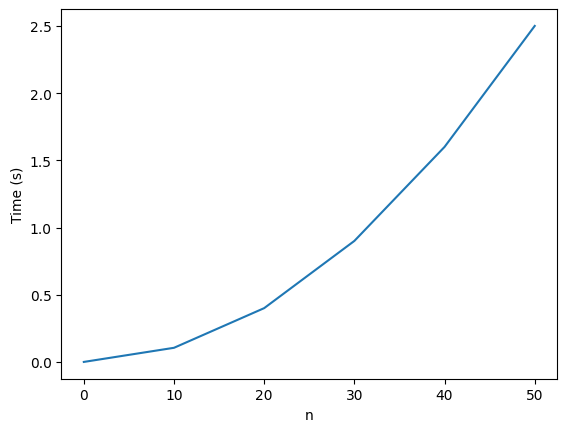

In [2]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)
    
def timeit(n):
    start = time.time()
    fake_function(n)
    end = time.time()
    return end-start
    
N = [0, 10, 20, 30, 40, 50]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```

Text(0.5, 1.0, 'analytical')

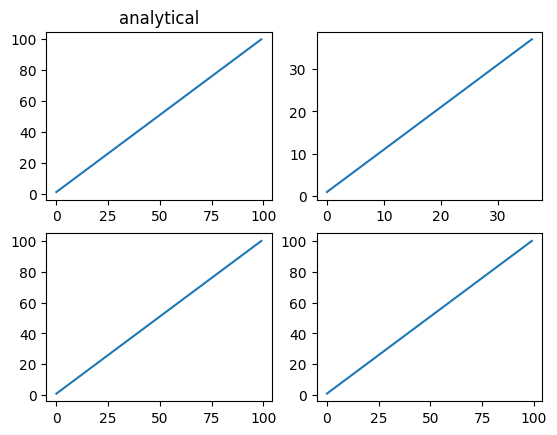

In [45]:
%matplotlib inline
import time
import matplotlib.pyplot as plot
import numpy as np

finalVal = 101

table = []

def fAnalytical(n):
    phi = (1 + np.sqrt(5))/ 2

    num = pow(phi, n) - pow((1 - phi), n)

    ans = np.round(num/np.sqrt(5))

    return ans

def fRecursiveTable(n):
    if(len(table) < n):
        print
        if (n <= 2):
            table.append(1)
        else:
            table.append(fRecursiveTable(n - 1) + fRecursiveTable(n - 2))
    
    return table[n - 1]
    

def fRecursive(n):
    if(n <= 2):
        return 1
    else:
        return fRecursive(n - 1) + fRecursive(n - 2)

def fLastTwo(n):

    a = 1
    b = 1
    
    for i in range(2, n):
        a, b = b, a+b
    
    return b

def timef(fToRun, i):
    start = time.time()
    fToRun(i)
    end = time.time()
    return end - start

def getAllTimes():
    tmpout = [[], [], [], [], []]

    for i in range(1, finalVal):
        if(i < 2 or tmpout[0][len(tmpout[0]) - 1] < 2):
            tmpout[0].append(timef(fLastTwo, i))
            
        if(i < 2 or tmpout[1][len(tmpout[1]) - 1] < 2):
            tmpout[1].append(timef(fRecursive, i))

        if(i < 2 or tmpout[2][len(tmpout[2]) - 1] < 2):
            tmpout[2].append(timef(fRecursiveTable, i))

        if(i < 2 or tmpout[3][len(tmpout[3]) - 1] < 2):
            tmpout[3].append(timef(fAnalytical, i))


    return tmpout

x = np.arange(1, finalVal)
y = getAllTimes()

fig, axis = plot.subplots(2, 2)

axis[0, 0].plot(x[:len(y[0])])
axis[0, 0].set_title("last 2")

axis[0, 1].plot(x[:len(y[1])])
axis[0, 0].set_title("recursive")

axis[1, 0].plot(x[:len(y[2])])
axis[0, 0].set_title("recursive table")

axis[1, 1].plot(x[:len(y[3])])
axis[0, 0].set_title("analytical")